In [51]:
import pandas as pd

In [94]:

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [95]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [97]:
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [98]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [99]:
covid_data

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


In [100]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [101]:
covid_data

,date,country,confirmed,deaths,recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0
4,2021-01-01,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0


In [102]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [103]:
covid_data

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


In [104]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [105]:
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
vaccinations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


In [107]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 11337 to 17645
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             86785 non-null  datetime64[ns]
 1   country          86785 non-null  object        
 2   confirmed        86785 non-null  float64       
 3   deaths           86785 non-null  float64       
 4   recovered        86785 non-null  float64       
 5   active           86785 non-null  float64       
 6   daily_confirmed  86564 non-null  float64       
 7   daily_deaths     86564 non-null  float64       
 8   daily_recovered  86564 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.6+ MB


In [108]:
covid_data.describe(include='datetime64')

<ipython-input-108-b5bbf65cf31f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  covid_data.describe(include='datetime64')


,date
count,86785
unique,494
top,2021-02-24 00:00:00
freq,194
first,2020-01-22 00:00:00
last,2021-05-29 00:00:00


In [109]:
vaccinations_data.describe(include='datetime64')

<ipython-input-109-8dc2a1596e15>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  vaccinations_data.describe(include='datetime64')


,date
count,42795
unique,279
top,2021-06-29 00:00:00
freq,216
first,2020-12-02 00:00:00
last,2021-09-06 00:00:00


In [110]:
covid_df=covid_data.merge(vaccinations_data, on=['date', 'country'],how='left')

In [111]:
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
covid_df.to_csv('data/covid_df.csv')

In [113]:
covid_df['death_rate']=covid_df['deaths']/covid_df['confirmed']*100

In [114]:
covid_df['recover_rate']=(covid_df['recovered']/covid_df['confirmed'])*100

In [115]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [118]:
covid_df[covid_df['country'] == 'United States']['death_rate'].describe()

count    494.000000
mean       2.723727
std        1.612642
min        0.000000
25%        1.779922
50%        2.102579
75%        3.329684
max        7.189542
Name: death_rate, dtype: float64

In [120]:
covid_df[covid_df['country'] == 'Russia']['recover_rate'].describe()

count    485.000000
mean      67.062735
std       29.904159
min        0.000000
25%       58.134801
50%       79.358398
75%       88.428421
max      100.000000
Name: recover_rate, dtype: float64

In [121]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()


In [122]:
grouped_cases

date
2020-01-22         0.0
2020-01-23       537.0
2020-01-24      -158.0
2020-01-25       495.0
2020-01-26       680.0
                ...   
2021-05-25    531845.0
2021-05-26    568216.0
2021-05-27    554368.0
2021-05-28    499934.0
2021-05-29    480835.0
Name: daily_confirmed, Length: 494, dtype: float64

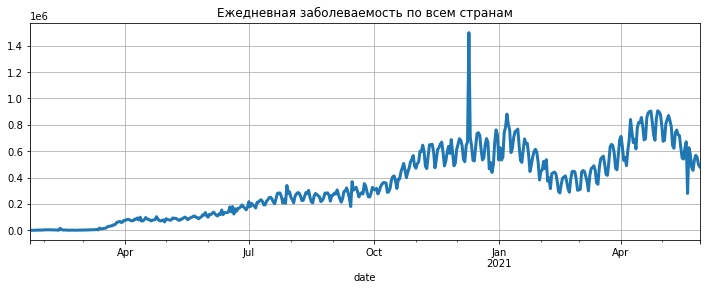

In [136]:
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);

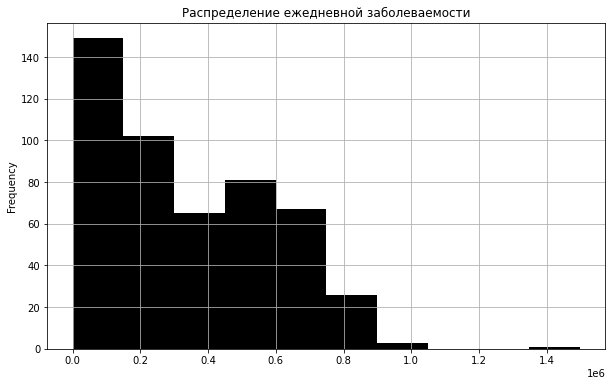

In [141]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

In [154]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()

In [155]:
grouped_country

country
Afghanistan                        70111.0
Albania                           132297.0
Algeria                           128456.0
Andorra                            13693.0
Angola                             34180.0
                                    ...   
West Bank and Gaza                307838.0
Yemen                               6731.0
Zambia                             94751.0
Zimbabwe                           38933.0
occupied Palestinian territory         0.0
Name: confirmed, Length: 221, dtype: float64

In [156]:
grouped_country = grouped_country.nlargest(10)

In [157]:
grouped_country

country
United States     33251939.0
India             27894800.0
Brazil            16471600.0
France             5719877.0
Turkey             5235978.0
Russia             4995613.0
United Kingdom     4496823.0
Italy              4213055.0
Argentina          3732263.0
Germany            3684672.0
Name: confirmed, dtype: float64

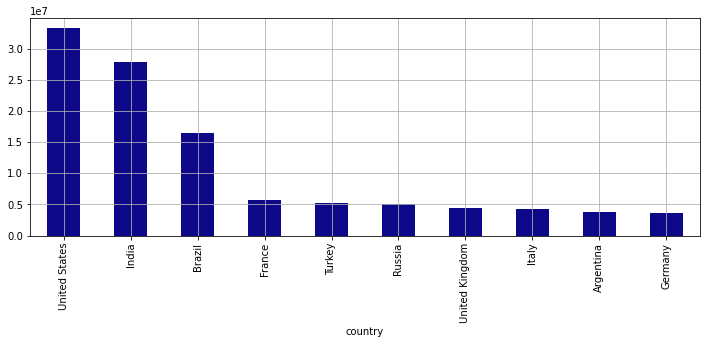

In [158]:


grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [159]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()

In [160]:
grouped_country

,confirmed,deaths
country,,
Afghanistan,70111.0,2899.0
Albania,132297.0,2449.0
Algeria,128456.0,3460.0
Andorra,13693.0,127.0
Angola,34180.0,757.0
...,...,...
West Bank and Gaza,307838.0,3492.0
Yemen,6731.0,1319.0
Zambia,94751.0,1276.0


In [161]:
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])

In [162]:
grouped_country

,confirmed,deaths
country,,
United States,33251939.0,594306.0
India,27894800.0,325972.0
Brazil,16471600.0,461057.0
France,5719877.0,109518.0
Turkey,5235978.0,47271.0
Russia,4995613.0,118781.0
United Kingdom,4496823.0,128037.0
Italy,4213055.0,126002.0
Argentina,3732263.0,77108.0


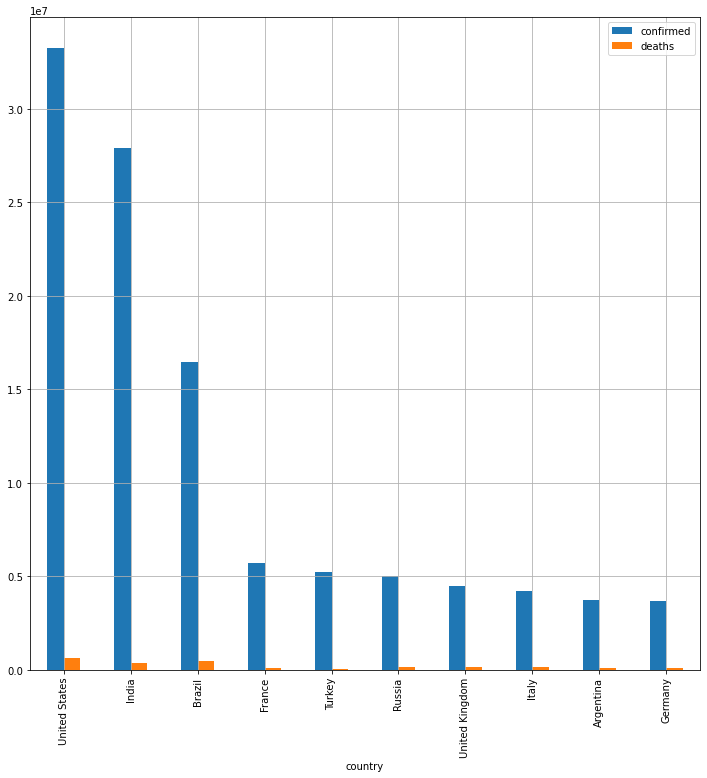

In [165]:
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 12), 
);


In [166]:
grouped_country_1 = grouped_country.nlargest(10, columns=['deaths'])

In [167]:
grouped_country_1

,confirmed,deaths
country,,
United States,33251939.0,594306.0
Brazil,16471600.0,461057.0
India,27894800.0,325972.0
United Kingdom,4496823.0,128037.0
Italy,4213055.0,126002.0
Russia,4995613.0,118781.0
France,5719877.0,109518.0
Germany,3684672.0,88413.0
Argentina,3732263.0,77108.0


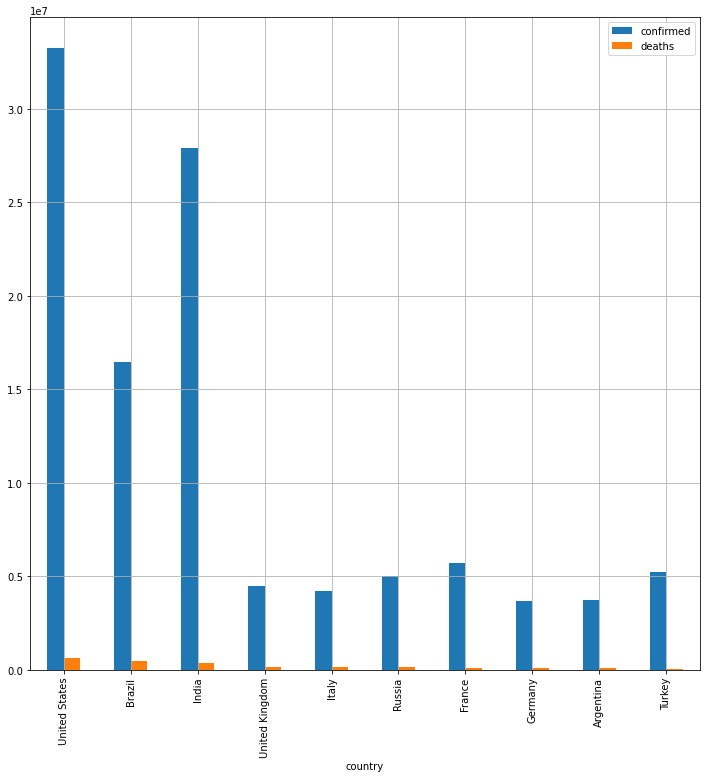

In [168]:
grouped_country_1.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 12), 
);


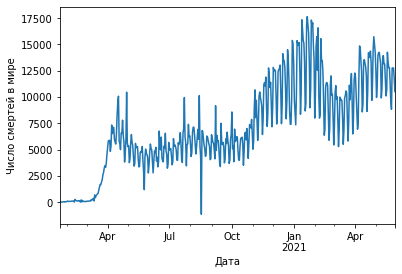

In [169]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

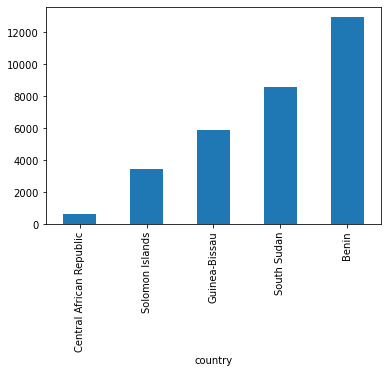

In [171]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');